# Comparing evaluation through detection and tracking metrics


#### Requirements
Firts you need to evaluate the outputs of the detectors and trackers with the commands:
```
python evaluation/mAP/main.py
python evaluation/scripts/run_mot_challenge.py --BENCHMARK <dataset_name> --USE_PARALLEL True --NUM_PARALLEL_CORES 4 --TRACKERS_TO_EVAL <tracker_name>
```

And generate a table with all the results. For that use the following command:
```
python evaluation/create_table.py
```

> You might need to use the `eval` environment to run the programs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

import auxiliar as aux

In [2]:
path = '../outputs/evaluation/'
file_name = 'all_metrics.csv'

tb = pd.read_csv(path + file_name, sep=",")

In [3]:
tb_20 = aux.select_dataset(tb, 'MOT20')
tb = aux.select_dataset(tb, 'MOT17')

In [4]:
tb_a = aux.search(tb, 'sort', 'public')
tb_a[['Set id', 'mAP', 'MOTA', 'HOTA(0)']]

,Set id,mAP,MOTA,HOTA(0)
278,MOT17-02,28.748089,0.320435,0.343676
279,MOT17-04,42.893776,0.539984,0.544565
280,MOT17-05,47.641404,0.451207,0.511215
281,MOT17-09,51.792453,0.530329,0.477923
282,MOT17-10,58.885698,0.495521,0.459941
283,MOT17-11,60.102493,0.554684,0.549020
284,MOT17-13,40.895173,0.458340,0.513108
285,COMBINED,-1.000000,0.485418,0.498851


In [11]:
tb_a = aux.search(tb, 'sort', 'gt')
tb_a[['Set id', 'MOTA', 'HOTA(0)']]

,Set id,MOTA,HOTA(0)
270,MOT17-02,0.909962,0.954888
271,MOT17-04,0.710411,0.878817
272,MOT17-05,0.865404,0.890944
273,MOT17-09,0.988920,0.986268
274,MOT17-10,0.974297,0.887750
275,MOT17-11,0.979017,0.969785
276,MOT17-13,0.538825,0.793573
277,COMBINED,0.801134,0.893508


In [10]:
tb_20 = aux.select_list(tb_20, ['sort', 'deep_sort', 'uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb = aux.select_list(tb, ['sort', 'deep_sort', 'uma', 'sst'], ['faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])

## Comparing detector and tracker outputs

Each detector and tracker applies different and various techniques to do their work. In this section we study the associative between trackers ussing different detectors outputs and the same ones.

In [6]:
aux.search(tb, 'uma', 'gt')

,Tracker,Detector,Dataset name,Set id,mAP,Precision,Recall,TP,FP,GT detections,...,ATA,FDA,SFDA,VACE_IDs,VACE_GT_IDs,num_non_empty_timesteps,Dets,GT_Dets,IDs,GT_IDs
198,uma,gt,MOT17,MOT17-02,100.0,100.0,100.0,26960,0,26960,...,0.278447,480.927490,0.801546,178,62,600,21729,18581,178,62
199,uma,gt,MOT17,MOT17-04,100.0,100.0,100.0,66005,0,66005,...,0.663347,772.832208,0.736031,106,83,1050,57186,47557,106,83
200,uma,gt,MOT17,MOT17-05,100.0,100.0,100.0,7754,0,7754,...,0.438083,680.330493,0.812820,240,133,837,7806,6917,240,133
201,uma,gt,MOT17,MOT17-09,100.0,100.0,100.0,5839,0,5839,...,0.334884,438.894631,0.835990,74,26,525,5523,5325,74,26
202,uma,gt,MOT17,MOT17-10,100.0,100.0,100.0,14240,0,14240,...,0.441131,554.325549,0.847593,122,57,654,13134,12839,122,57
203,uma,gt,MOT17,MOT17-11,100.0,100.0,100.0,9518,0,9518,...,0.608075,758.346196,0.842607,103,75,900,9787,9436,103,75
204,uma,gt,MOT17,MOT17-13,100.0,100.0,100.0,16663,0,16663,...,0.674815,506.847205,0.675796,147,110,750,16971,11642,147,110
205,uma,gt,MOT17,COMBINED,-1.0,-1.0,-1.0,-1,-1,-1,...,0.494539,4192.503770,0.788658,970,546,5316,132136,112297,970,546


In [7]:
result_m = aux.correlation_matrix(tb)
result_m2 = aux.correlation_matrix(tb, metrics='tracking')
result_m3 = aux.correlation_matrix(tb, metrics='detection')

aux.plot_matrix(result_m, aux.combinations(tb), plot_values=False)

ZeroDivisionError: division by zero

## Comparing metrics

Metrics are used to score detectors and trackers, while deciding which ones perform better in the given scenarios. In this section we want to study the correlation between metrics and see if there is any case where the metrics are similar.

As we can see in the matrix of results there are some interesting results we want to discuss.

In detection metrics, *mAP* and *Recall* are high correlated.
 - precision and recall mostly opposite.
 - Precision and FP are opposite -> following the precision formula it has sense.
 - Recall and mAP are opposite of FN -> With the formula it has sense.
 
Tracking metrics:
 - HOTA and IDF1 are very similar. ATA is also similar to both.
 - MOTP is more similar to ATA than to MOTA.
 - MOTA is the opposite of IDSW -> ????

Mixed:
 - IDSW is similar to FP.
 - HOTA has a direct relation with mAP.
 - MOTA has a direct relation with Precision.

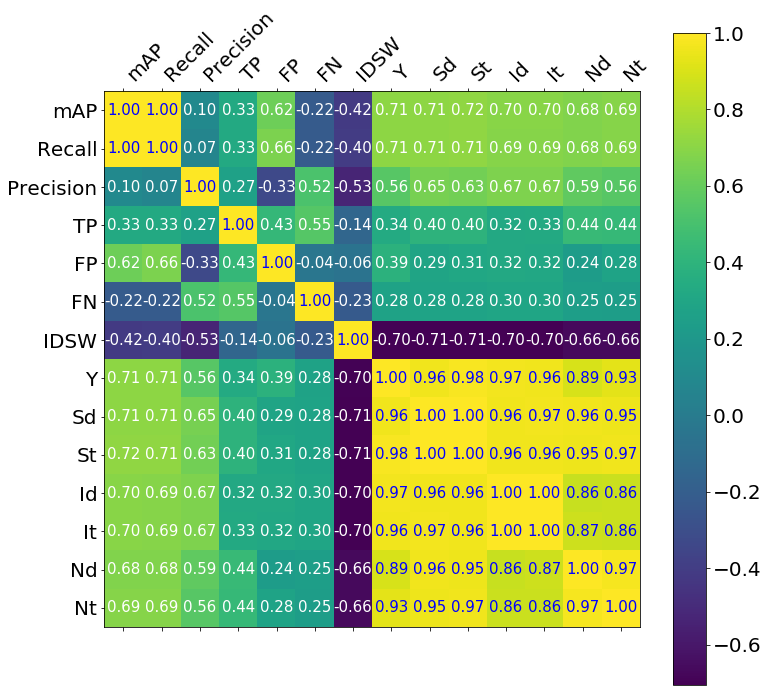

In [11]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'ATA', 'IDSW', 'S', 'Sd', 'St', 'Id', 'It', 'Nd', 'Nt']
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'IDSW', 'Y', 'Sd', 'St', 'Id', 'It', 'Nd', 'Nt']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics)

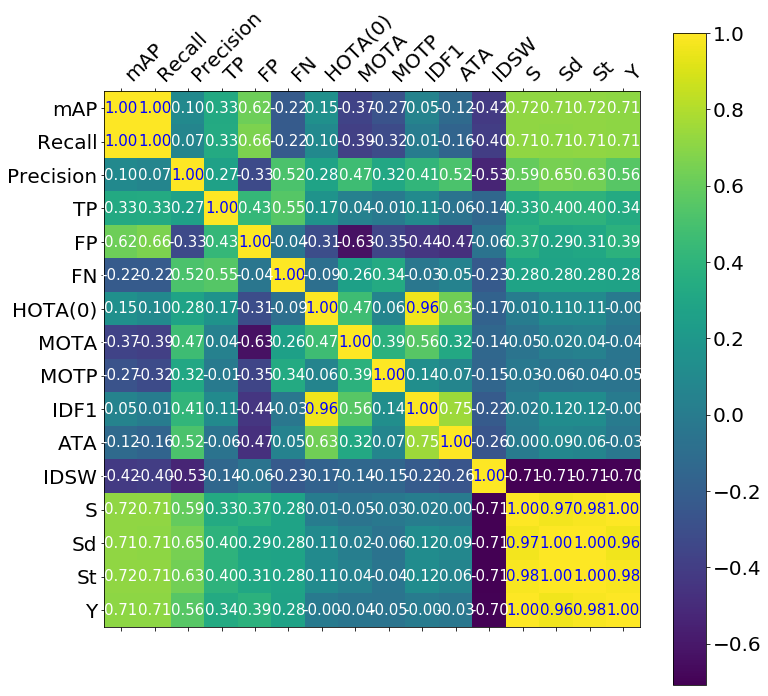

In [12]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'ATA', 'IDSW', 'S', 'Sd', 'St', 'Y']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics)

## Matrix for each tracker

SORT


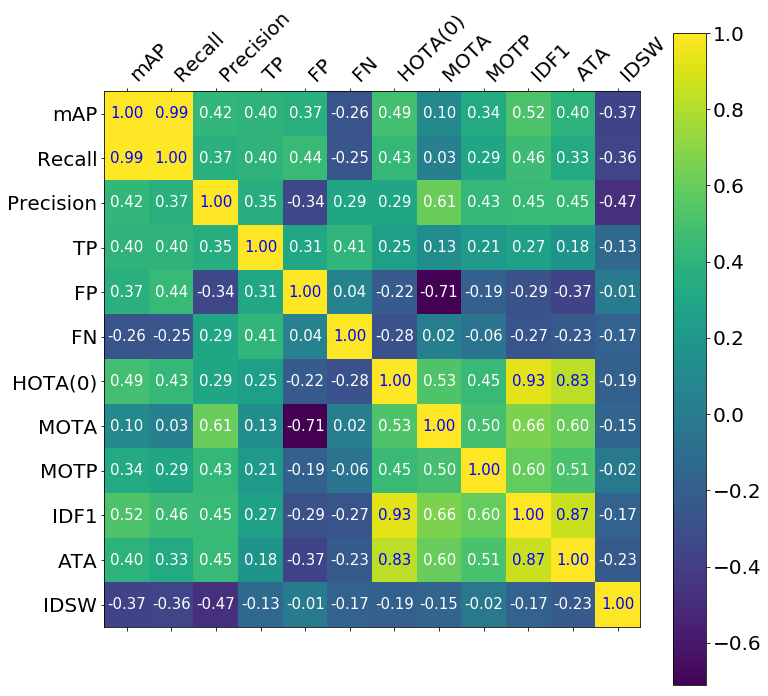

DEEP_SORT


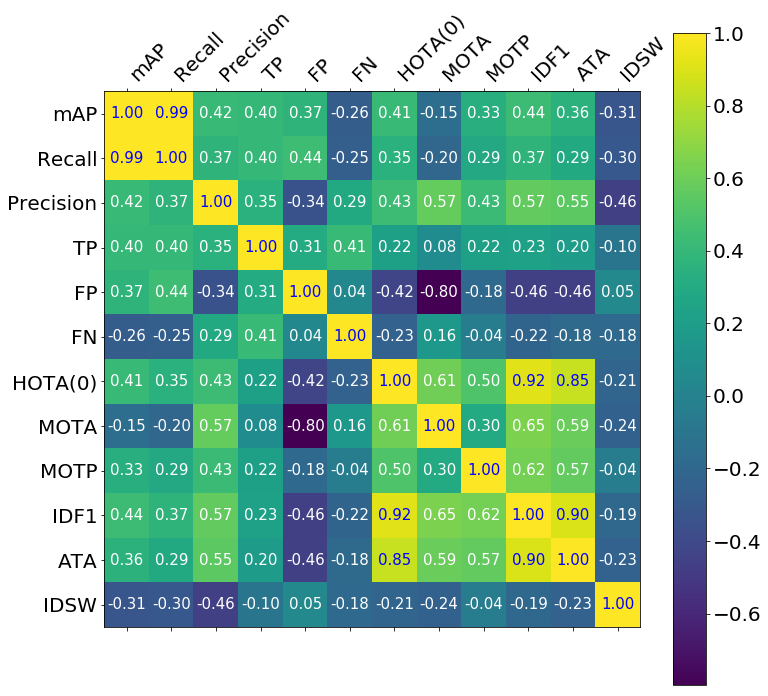

UMA


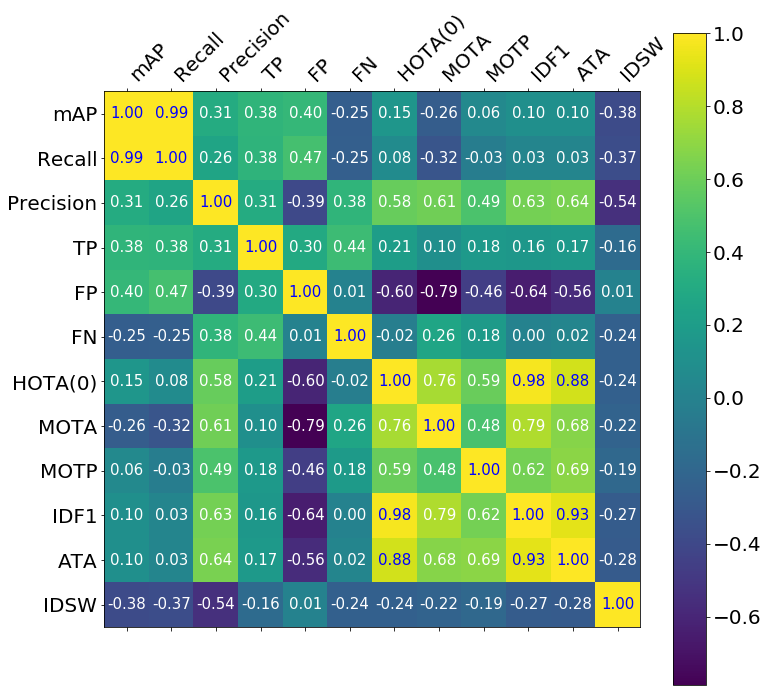

SST


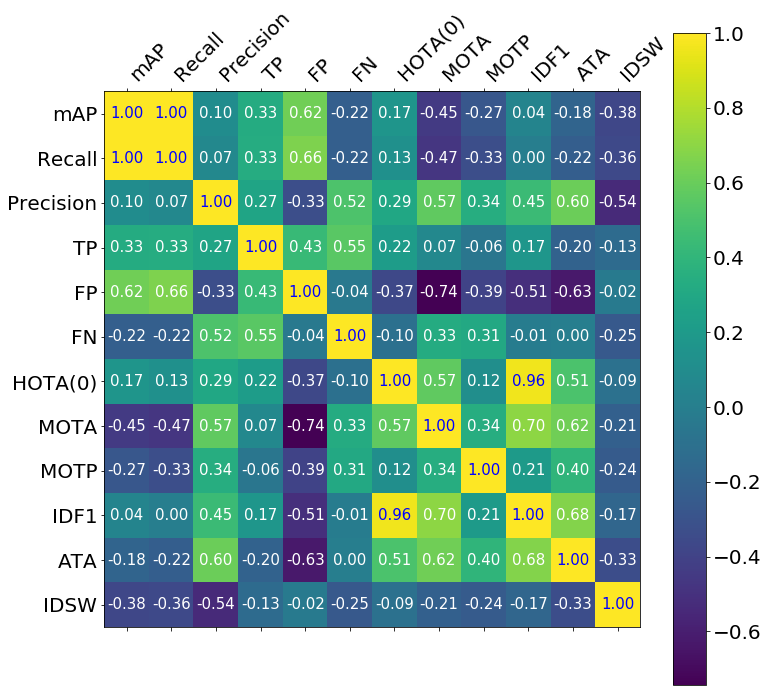

In [9]:
for trk in tb['Tracker'].unique():
    
    tb_search = aux.search(tb, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics)

## Tables of data

In [10]:
m = aux.search(tb, 'sort', 'faster_rcnn')
m[['mAP', 'Precision', 'Recall', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'IDSW', 'ATA']]

,mAP,Precision,Recall,TP,FP,FN,HOTA(0),MOTA,MOTP,IDF1,IDSW,ATA
222,41.686243,37.103031,51.439169,13868,23509,13092,0.310986,-0.226952,0.754278,0.238481,482,0.018570
223,54.103815,56.480588,61.207484,40400,31129,25605,0.519879,0.076792,0.793972,0.425914,351,0.043214
224,64.077723,24.408495,72.775342,5643,17476,2111,0.468969,-0.261963,0.745297,0.371435,303,0.062577
225,67.048168,31.096708,72.306902,4222,9355,1617,0.473520,0.056150,0.804811,0.393205,96,0.038059
226,65.413921,27.925553,74.389045,10593,27340,3647,0.309919,-0.151180,0.733402,0.211041,714,0.012892
227,67.183533,23.260798,74.122715,7055,23275,2463,0.480671,-0.357143,0.816446,0.356835,158,0.035124
228,64.736747,28.949464,76.354798,12723,31226,3940,0.320055,-1.046641,0.729137,0.221308,538,0.030688
229,-1.000000,-1.000000,-1.000000,-1,-1,-1,0.433798,-0.174306,0.774484,0.332737,2642,0.032561
222,41.686243,37.103031,51.439169,13868,23509,13092,0.310986,-0.226952,0.754278,0.238481,482,0.018570
223,54.103815,56.480588,61.207484,40400,31129,25605,0.519879,0.076792,0.793972,0.425914,351,0.043214


In [11]:
m = aux.search(tb, 'deep_sort', 'faster_rcnn-fine-tune')
m[['mAP', 'Precision', 'Recall', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'IDSW', 'ATA']]

,mAP,Precision,Recall,TP,FP,FN,HOTA(0),MOTA,MOTP,IDF1,IDSW,ATA
406,59.510762,33.888257,71.880564,19379,37806,7581,0.259144,-1.545665,0.733194,0.160306,1408,0.045136
407,71.994412,77.600880,72.664192,47962,13844,18043,0.526540,0.234014,0.805252,0.450112,568,0.139291
408,74.405801,18.562839,81.622388,6329,27766,1425,0.302419,-2.933786,0.757111,0.212847,419,0.058647
409,80.907313,22.173971,84.826169,4953,17384,886,0.284964,-2.875869,0.797487,0.182378,209,0.029226
410,79.539278,27.399269,87.914326,12519,33172,1721,0.302102,-1.861983,0.741541,0.194027,880,0.038862
411,84.047280,16.403265,89.745745,8542,43533,976,0.274886,-3.783807,0.814723,0.176562,330,0.037503
412,76.004695,34.137328,83.154294,13856,26733,2807,0.338033,-1.766277,0.731143,0.230662,603,0.069066
413,-1.000000,-1.000000,-1.000000,-1,-1,-1,0.354428,-1.187663,0.775313,0.256405,4417,0.053584
406,59.510762,33.888257,71.880564,19379,37806,7581,0.259144,-1.545665,0.733194,0.160306,1408,0.045136
407,71.994412,77.600880,72.664192,47962,13844,18043,0.526540,0.234014,0.805252,0.450112,568,0.139291


In [12]:
m = aux.search(tb, 'sst', 'faster_rcnn-fine-tune')
m[['mAP', 'Precision', 'Recall', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'IDSW', 'ATA']]

,mAP,Precision,Recall,TP,FP,FN,HOTA(0),MOTA,MOTP,IDF1,IDSW,ATA
318,59.510762,33.888257,71.880564,19379,37806,7581,0.285409,-0.930036,0.742124,0.189885,2147,0.006422
319,71.994412,77.600880,72.664192,47962,13844,18043,0.593237,0.250983,0.805542,0.528982,1158,0.077174
320,74.405801,18.562839,81.622388,6329,27766,1425,0.265021,-3.584791,0.765821,0.161539,1269,0.037341
321,80.907313,22.173971,84.826169,4953,17384,886,0.277881,-3.074178,0.801018,0.164224,684,0.023821
322,79.539278,27.399269,87.914326,12519,33172,1721,0.303227,-1.939793,0.745148,0.184727,1734,0.009082
323,84.047280,16.403265,89.745745,8542,43533,976,0.300205,-3.926558,0.819692,0.182669,827,0.018041
324,76.004695,34.137328,83.154294,13856,26733,2807,0.332113,-2.014946,0.738994,0.215263,1724,0.027378
325,-1.000000,-1.000000,-1.000000,-1,-1,-1,0.379039,-1.174787,0.779518,0.273512,9543,0.019452


In [13]:
m = aux.search(tb, 'uma', 'faster_rcnn-fine-tune')
m[['mAP', 'Precision', 'Recall', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'IDSW', 'ATA']]

,mAP,Precision,Recall,TP,FP,FN,HOTA(0),MOTA,MOTP,IDF1,IDSW,ATA
158,59.510762,33.888257,71.880564,19379,37806,7581,0.247216,-2.191217,0.724218,0.168753,1398,0.091088
159,71.994412,77.600880,72.664192,47962,13844,18043,0.536223,0.031962,0.783980,0.467204,449,0.243032
160,74.405801,18.562839,81.622388,6329,27766,1425,0.222896,-5.553853,0.742510,0.142928,627,0.090549
161,80.907313,22.173971,84.826169,4953,17384,886,0.230533,-4.977653,0.773065,0.141747,325,0.057569
162,79.539278,27.399269,87.914326,12519,33172,1721,0.277961,-3.278994,0.739412,0.189173,816,0.080788
163,84.047280,16.403265,89.745745,8542,43533,976,0.200973,-6.690441,0.790801,0.118151,391,0.066713
164,76.004695,34.137328,83.154294,13856,26733,2807,0.296730,-3.275812,0.726188,0.220028,557,0.149262
165,-1.000000,-1.000000,-1.000000,-1,-1,-1,0.318844,-2.203834,0.759764,0.231384,4563,0.101090
158,59.510762,33.888257,71.880564,19379,37806,7581,0.247216,-2.191217,0.724218,0.168753,1398,0.091088
159,71.994412,77.600880,72.664192,47962,13844,18043,0.536223,0.031962,0.783980,0.467204,449,0.243032


## Matrix with more metrics

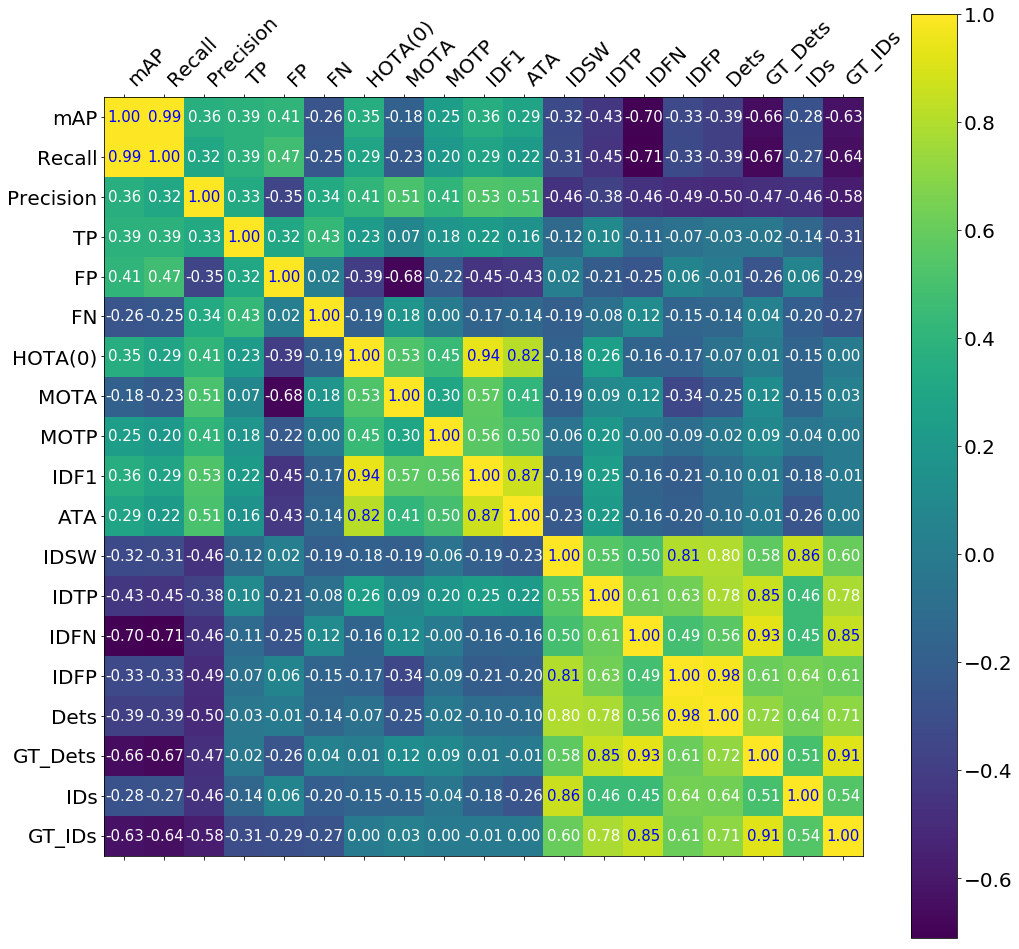

In [14]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'ATA', 'IDSW', 'IDTP', 'IDFN', 'IDFP', 'Dets', 'GT_Dets', 'IDs', 'GT_IDs']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, figsize=(17, 17))

## MOT 20

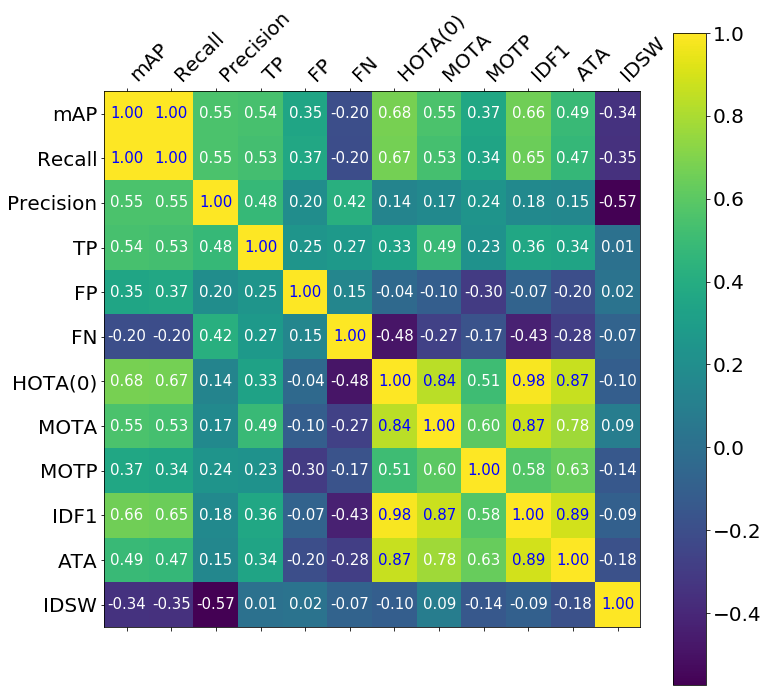

In [15]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'ATA', 'IDSW']
result_m = aux.correlation_metrics(tb_20, metrics)

aux.plot_matrix(result_m, metrics)